# --------------------------  ---      US Accidents Analysis Project      ---       ------------------------

## Dataset Overview.
    
This is a countrywide car accident dataset, which covers 49 states of the USA. The accident data are collected from February 2016 to Dec 2021, using multiple APIs that provide streaming traffic incident (or event) data. These APIs broadcast traffic data captured by a variety of entities, such as the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road-networks. Currently, there are about 2.8 million accident records in this dataset. Check here to learn more about this dataset.

#### Acknowledgements
Please cite the following papers if you use this dataset:

Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, and Rajiv Ramnath. “A Countrywide Traffic Accident Dataset.”, 2019.

Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, Radu Teodorescu, and Rajiv Ramnath. "Accident Risk Prediction based on Heterogeneous Sparse Data: New Dataset and Insights." In proceedings of the 27th ACM SIGSPATIAL International Conference on Advances in Geographic Information Systems, ACM, 2019.

#### Content
This dataset has been collected in real-time, using multiple Traffic APIs. Currently, it contains accident data that are collected from February 2016 to Dec 2021 for the Contiguous United States. Check here to learn more about this dataset.

#### Inspiration
US-Accidents can be used for numerous applications such as real-time car accident prediction, studying car accidents hotspot locations, casualty analysis and extracting cause and effect rules to predict car accidents, and studying the impact of precipitation or other environmental stimuli on accident occurrence. The most recent release of the dataset can also be useful to study the impact of COVID-19 on traffic behavior and accidents.

#### Usage Policy and Legal Disclaimer
This dataset is being distributed only for Research purposes, under Creative Commons Attribution-Noncommercial-ShareAlike license (CC BY-NC-SA 4.0). By clicking on download button(s) below, you are agreeing to use this data only for non-commercial, research, or academic applications. You may need to cite the above papers if you use this dataset.

## Section 1: Importing Libraries and Downloading Dataset

### 1.1 Importing important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
%matplotlib inline

### 1.2 Downloading the dataset.

I have used the 'opendatasets' library to download the data directly from Kaggle.

In [ ]:
pip install opendatasets --upgrade

In [5]:
import opendatasets as od
download_url = 'https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents'
od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: rajatmann
Your Kaggle Key: ········


100%|██████████| 269M/269M [00:29<00:00, 9.42MB/s] 


# Section 2: Data Prepration and Cleaning

### Steps Taken:

1. Load the file using Pandas
2. Looking at the data and deepen the understanding of diffrent columns.
3. fixing missing or incorrect data.

## 2.1 Loading the file and Analyzing the loaded data.

In [2]:
df = pd.read_csv('US_Accidents_Dec21_updated.csv')

In [3]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [5]:
df.describe().info() #to get a count of number of numerical columns.

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, count to max
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Severity           8 non-null      float64
 1   Start_Lat          8 non-null      float64
 2   Start_Lng          8 non-null      float64
 3   End_Lat            8 non-null      float64
 4   End_Lng            8 non-null      float64
 5   Distance(mi)       8 non-null      float64
 6   Number             8 non-null      float64
 7   Temperature(F)     8 non-null      float64
 8   Wind_Chill(F)      8 non-null      float64
 9   Humidity(%)        8 non-null      float64
 10  Pressure(in)       8 non-null      float64
 11  Visibility(mi)     8 non-null      float64
 12  Wind_Speed(mph)    8 non-null      float64
 13  Precipitation(in)  8 non-null      float64
dtypes: float64(14)
memory usage: 960.0+ bytes


In [6]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


## 2.2 Fixing missing data and incorrect values.

In [7]:
df.isnull().sum().sort_values(ascending = False) #For number of missing values per column.

Number                   1743911
Precipitation(in)         549458
Wind_Chill(F)             469643
Wind_Speed(mph)           157944
Wind_Direction             73775
Humidity(%)                73092
Weather_Condition          70636
Visibility(mi)             70546
Temperature(F)             69274
Pressure(in)               59200
Weather_Timestamp          50736
Airport_Code                9549
Timezone                    3659
Nautical_Twilight           2867
Civil_Twilight              2867
Sunrise_Sunset              2867
Astronomical_Twilight       2867
Zipcode                     1319
City                         137
Street                         2
Country                        0
Junction                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Turning_Loop                   0
Traffic_Signal                 0
Traffic_Calming                0
Stop                           0
Station                        0
Roundabout

#### Missing values in form of percentages and visualizing it for better understanding.

In [8]:
missing_percentages = df.isnull().sum().sort_values(ascending = False)/len(df)
missing_percentages

Number                   6.129003e-01
Precipitation(in)        1.931079e-01
Wind_Chill(F)            1.650568e-01
Wind_Speed(mph)          5.550967e-02
Wind_Direction           2.592834e-02
Humidity(%)              2.568830e-02
Weather_Condition        2.482514e-02
Visibility(mi)           2.479350e-02
Temperature(F)           2.434646e-02
Pressure(in)             2.080593e-02
Weather_Timestamp        1.783125e-02
Airport_Code             3.356011e-03
Timezone                 1.285961e-03
Nautical_Twilight        1.007612e-03
Civil_Twilight           1.007612e-03
Sunrise_Sunset           1.007612e-03
Astronomical_Twilight    1.007612e-03
Zipcode                  4.635647e-04
City                     4.814887e-05
Street                   7.029032e-07
Country                  0.000000e+00
Junction                 0.000000e+00
Start_Time               0.000000e+00
End_Time                 0.000000e+00
Start_Lat                0.000000e+00
Turning_Loop             0.000000e+00
Traffic_Sign

In [9]:
data = missing_percentages[missing_percentages != 0] #Removing rows that have zeros
data

Number                   6.129003e-01
Precipitation(in)        1.931079e-01
Wind_Chill(F)            1.650568e-01
Wind_Speed(mph)          5.550967e-02
Wind_Direction           2.592834e-02
Humidity(%)              2.568830e-02
Weather_Condition        2.482514e-02
Visibility(mi)           2.479350e-02
Temperature(F)           2.434646e-02
Pressure(in)             2.080593e-02
Weather_Timestamp        1.783125e-02
Airport_Code             3.356011e-03
Timezone                 1.285961e-03
Nautical_Twilight        1.007612e-03
Civil_Twilight           1.007612e-03
Sunrise_Sunset           1.007612e-03
Astronomical_Twilight    1.007612e-03
Zipcode                  4.635647e-04
City                     4.814887e-05
Street                   7.029032e-07
dtype: float64

<AxesSubplot:title={'center':'Missing Percentages'}, xlabel='Column name', ylabel='Percentage in e-01'>

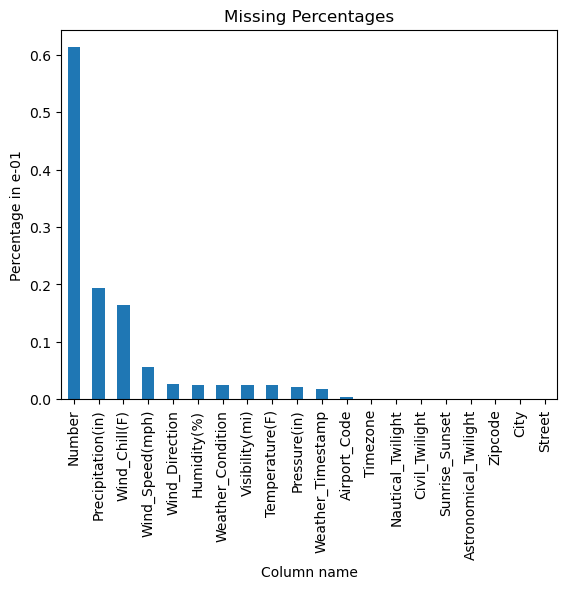

In [10]:
data.plot(kind = 'bar', title = 'Missing Percentages', xlabel = 'Column name', ylabel = 'Percentage in e-01')

### Droping the columns that have a missing percentage of more than 10%

In [11]:
#Run this cell only when required.
#df.drop('number')
#df.drop('Precipitation(in)')
#df.drop('wind_chill(F)')
        
#OR use this sytax
        
# df.drop(['number', 'Precipitation(in)','wind_chill(F)'])

# Section 3: Exploratory Analysis and Visualization

### I have used Matplotlib, Seaborn and In-built Pandas visuliszation for most part.

Some interesting columns worth looking into are:

1. City
2. Start_Time
3. Start_lng, start_lat
4. Temperature
5. Weather_Condition
6. Sunrise sunset

and many more...

In [12]:
Num_Accidents_city = df['City'].value_counts() #To get the number of accidents per city and sort them in descending order.
Num_Accidents_city

Miami                           106966
Los Angeles                      68956
Orlando                          54691
Dallas                           41979
Houston                          39448
                                 ...  
Ridgedale                            1
Sekiu                                1
Wooldridge                           1
Bullock                              1
American Fork-Pleasant Grove         1
Name: City, Length: 11681, dtype: int64

<AxesSubplot:title={'center':'Cities with highest number of Accidents'}>

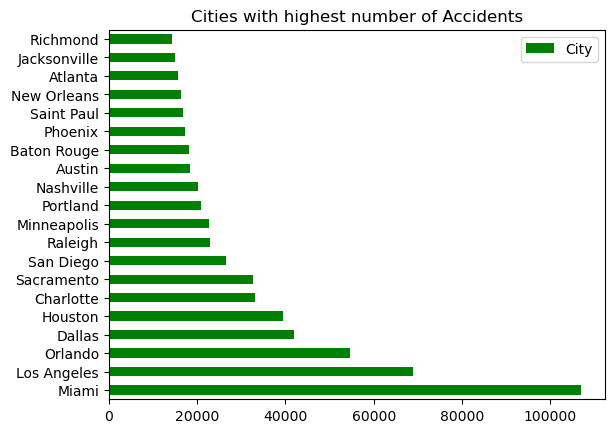

In [13]:
 Num_Accidents_city[:20].plot.barh(color = ['g'], title = "Cities with highest number of Accidents", legend  = True) #For top 20 cities in accident numbers

### Classifying High and Low Accident rate cities.

In [14]:
High_AccidentRate_cities = Num_Accidents_city[Num_Accidents_city > 1000]

In [15]:
Low_AccidentRate_cities = Num_Accidents_city[Num_Accidents_city < 1000]

In [16]:
len(Low_AccidentRate_cities)/len(Num_Accidents_city) * 100 # Percentage out of total.

95.7537882030648

In [17]:
len(High_AccidentRate_cities)/len(Num_Accidents_city) * 100 # Percentage out of total.

4.229089975173358

C:\Users\rajat\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='City', ylabel='Density'>

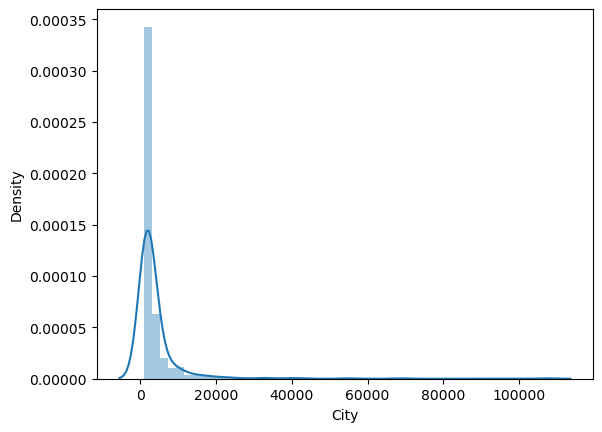

In [18]:
sns.distplot(High_AccidentRate_cities)

<AxesSubplot:xlabel='City', ylabel='Density'>

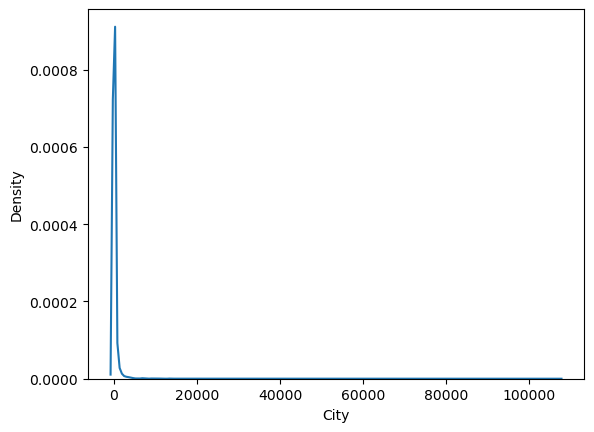

In [19]:
sns.kdeplot(Num_Accidents_city)

In [20]:
#New York has the highest population in USA, why does it still have such a low number of accidents compared to top 20? lets look into this later on.
Num_Accidents_city['New York'] 

7068

<AxesSubplot:xlabel='City', ylabel='Count'>

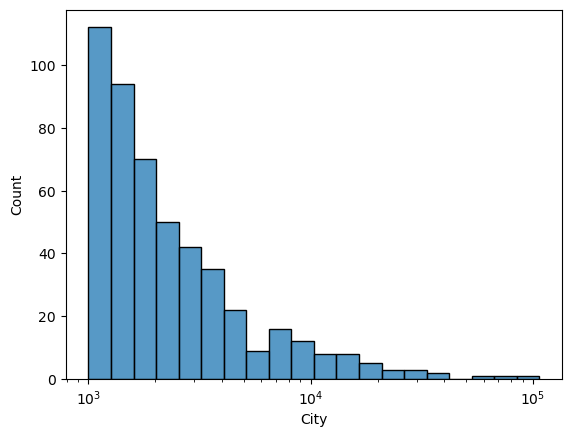

In [35]:
sns.histplot(High_AccidentRate_cities, log_scale= True,stat = 'count', element = 'bars')

<AxesSubplot:xlabel='City', ylabel='Count'>

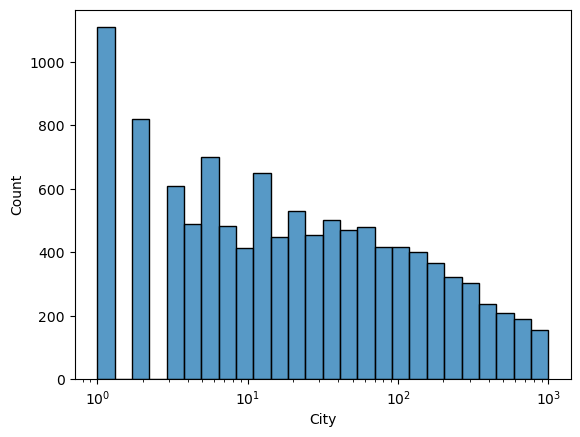

In [24]:
sns.histplot(Low_AccidentRate_cities, log_scale= True)

<AxesSubplot:xlabel='City', ylabel='Count'>

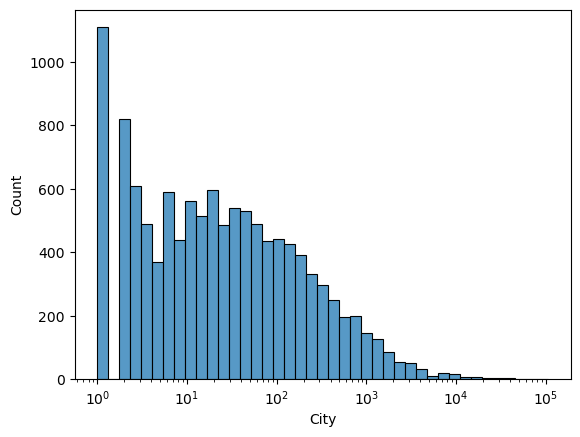

In [36]:
sns.histplot(Num_Accidents_city, log_scale= True)

In [166]:
Num_Accidents_city[Num_Accidents_city <= 9] 

Brimfield                       9
Huntertown                      9
Vidalia                         9
Sunburst                        9
Steamboat Rock                  9
                               ..
Ridgedale                       1
Sekiu                           1
Wooldridge                      1
Bullock                         1
American Fork-Pleasant Grove    1
Name: City, Length: 4428, dtype: int64

This signifies that many cities in our data has number of accidents in single digit only, which makes it difficult to do an analysis for those Cities.

### Analysing at what times of day the most accidents occur.

In [44]:
df['Sunrise_Sunset'].value_counts()

Day      1811935
Night    1030540
Name: Sunrise_Sunset, dtype: int64

<AxesSubplot:title={'center':'Day vs Night Accident numbers'}, xlabel='Time of Day', ylabel='Number of Accidents'>

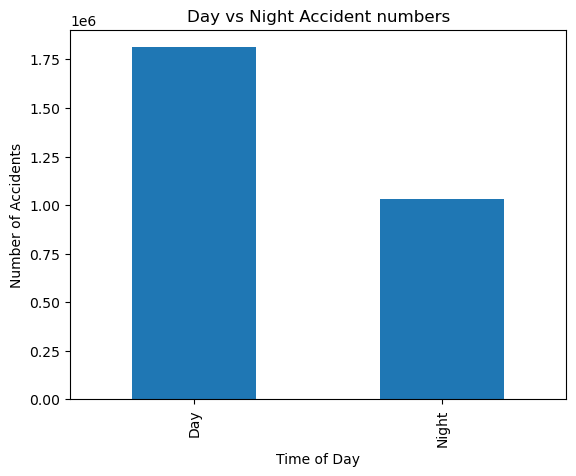

In [45]:
df['Sunrise_Sunset'].value_counts().plot(kind = 'bar', title = 'Day vs Night Accident numbers', xlabel = 'Time of Day', ylabel = 'Number of Accidents')

In [78]:
df[['Start_Time','End_Time', 'Sunrise_Sunset']].head(20)

,Start_Time,End_Time,Sunrise_Sunset
0,2016-02-08 00:37:08,2016-02-08 06:37:08,Night
1,2016-02-08 05:56:20,2016-02-08 11:56:20,Night
2,2016-02-08 06:15:39,2016-02-08 12:15:39,Night
3,2016-02-08 06:51:45,2016-02-08 12:51:45,Night
4,2016-02-08 07:53:43,2016-02-08 13:53:43,Day
5,2016-02-08 08:16:57,2016-02-08 14:16:57,Day
6,2016-02-08 08:15:41,2016-02-08 14:15:41,Day
7,2016-02-08 11:51:46,2016-02-08 17:51:46,Day
8,2016-02-08 14:19:57,2016-02-08 20:19:57,Day
9,2016-02-08 15:16:43,2016-02-08 21:16:43,Day


In [83]:
df.Start_Time = pd.to_datetime(df.Start_Time)

In [86]:
df.Start_Time[0] # Earlier the "Start_Time" column was STR type, now it has ben converted to DateTime.

Timestamp('2016-02-08 00:37:08')

In [95]:
df.Start_Time[0].time()

datetime.time(0, 37, 8)

In [162]:
# Extracting hours from df.Start_Time
Times = []
for i in df.Start_Time:
    Times.append(i.hour)
Times[:10]

[0, 5, 6, 6, 7, 8, 8, 11, 14, 15]

In [151]:
Percent_Times = (pd.value_counts(Times)/len(Times))*100 #Number of Accidents around diffrent hours of day.

<AxesSubplot:title={'center':'Percentage of Accidents Per hour of Day'}, xlabel='Hour of Day', ylabel='Percent of accidents'>

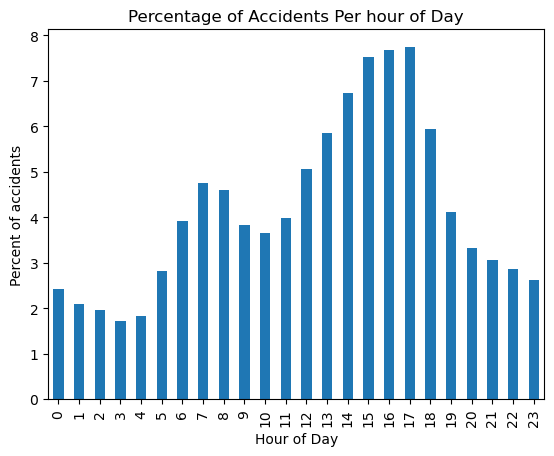

In [156]:
Percent_Times.sort_index().plot(kind = 'bar', xlabel = "Hour of Day", ylabel = 'Percent of accidents', title = "Percentage of Accidents Per hour of Day")

<AxesSubplot:ylabel='Count'>

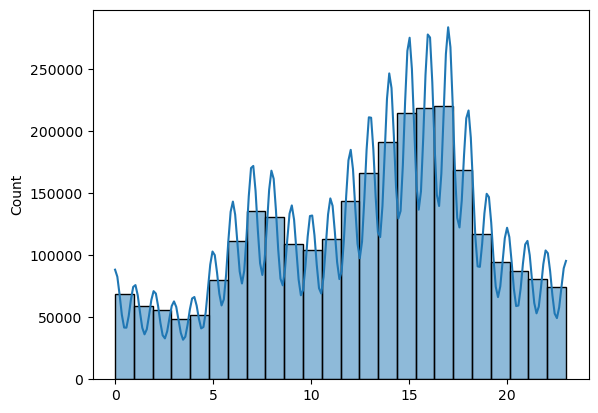

In [158]:
sns.histplot(Times,bins = 24, kde = True)

<AxesSubplot:title={'center':'Count of Accidents Per hour of Day'}, xlabel='Hour of Day', ylabel='Count of accidents'>

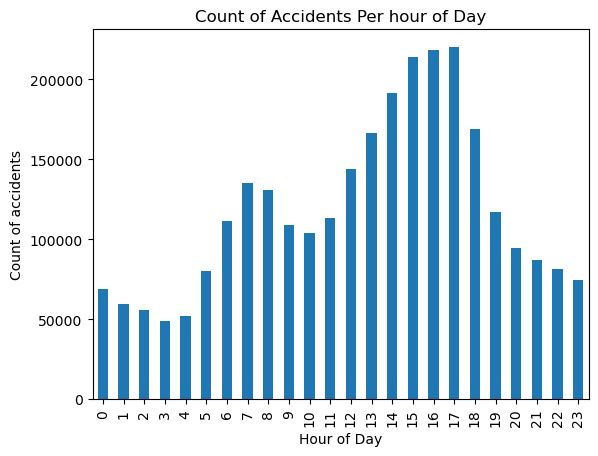

In [159]:
pd.value_counts(Times).sort_index().plot(kind = 'bar',xlabel = "Hour of Day", ylabel = 'Count of accidents', title = "Count of Accidents Per hour of Day")

<AxesSubplot:ylabel='Hour of Day'>

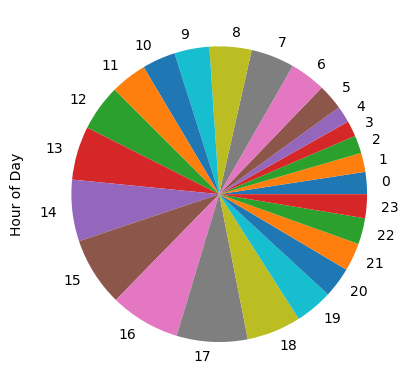

In [163]:
pd.value_counts(Times).sort_index().plot(kind = 'pie', label = 'Hour of Day')

### Conclusion from time analysis:
1. From the above Analysis, we can see that majority of accidents happen between 1 P.M - 7 P.M, which come under 'Day' time. The reason might be because at this time of day people usually start going out for lunch i.e around 1-3 P.M and after that around 4 P.m people start traveling back home from their Office, School or their Jobs in general.
2. We can also come to this conclusion that Night time hours are the best for travelling as they show less percentages of accidents.

### Analysing on what days of week does the most Accidents occur.

In [172]:
Day_of_Accident = []
for i in df.Start_Time:
    if i.weekday() == 0:
        Day_of_Accident.append('Monday')
    elif i.weekday() == 1:
        Day_of_Accident.append('Tuesday')
    elif i.weekday() == 2:
        Day_of_Accident.append('Wednesday')
    elif i.weekday() == 3:
        Day_of_Accident.append('Thursday')
    elif i.weekday() == 4:
        Day_of_Accident.append('Friday')
    elif i.weekday() == 5:
        Day_of_Accident.append('Saturday')
    else:
        Day_of_Accident.append('Sunday')


In [177]:
pd.value_counts(Day_of_Accident) #Number of accidents per day of week.

Friday       492074
Thursday     463477
Wednesday    455037
Tuesday      443968
Monday       419821
Saturday     311691
Sunday       259274
dtype: int64

In [180]:
Percent_Day_of_Accident = pd.value_counts(Day_of_Accident)/len(Day_of_Accident) *100

<AxesSubplot:title={'center':'Accidents per day of week'}, xlabel='Day of Week', ylabel='Percentage of Accidents'>

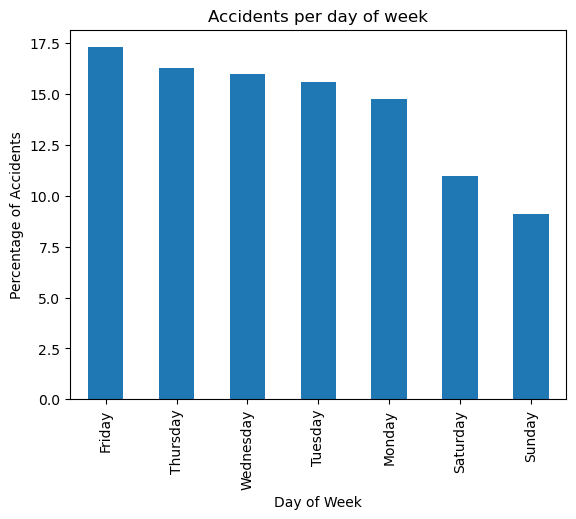

In [184]:
Percent_Day_of_Accident.plot(kind = 'bar', xlabel = "Day of Week", ylabel = 'Percentage of Accidents', title = "Accidents per day of week")

* From the above visualisation we can determine that starting Monday until Friday the accidents ratio keeps on increasing but it falls on the weekend, which entails that Accidents are more likely to happen on weekdays due to work pressure, while on weekends people usually relax at thier homes.

### Per month Accident rate analysis

In [226]:
Month_of_Accident = []
num_month = []
for i in df.Start_Time:
    if i.month == 1:
        num_month.append(i.month)
        Month_of_Accident.append("January")
    elif i.month == 2:
        num_month.append(i.month)
        Month_of_Accident.append("February")
    elif i.month == 3:
        num_month.append(i.month)
        Month_of_Accident.append("March")
    elif i.month == 4:
        num_month.append(i.month)
        Month_of_Accident.append("April")
    elif i.month == 5:
        num_month.append(i.month)
        Month_of_Accident.append("May")
    elif i.month == 6:
        num_month.append(i.month)
        Month_of_Accident.append("June")
    elif i.month == 7:
        num_month.append(i.month)
        Month_of_Accident.append("July")
    elif i.month == 8:
        num_month.append(i.month)
        Month_of_Accident.append("August")
    elif i.month == 9:
        num_month.append(i.month)
        Month_of_Accident.append("September")
    elif i.month == 10:
        num_month.append(i.month)
        Month_of_Accident.append("October")
    elif i.month == 11:
        num_month.append(i.month)
        Month_of_Accident.append("November")
    elif i.month == 12:
        num_month.append(i.month)
        Month_of_Accident.append("December")

In [222]:
Percent_Month_of_Accident = pd.value_counts(Month_of_Accident) / len(Month_of_Accident) * 100 # Percentage of accident per month.

In [223]:
Percent_Month_of_Accident

December     16.656803
November     12.676719
October      10.513007
September     8.498873
June          7.962523
January       6.971570
February      6.853130
May           6.394451
August        6.279386
April         6.040750
July          5.591982
March         5.560808
dtype: float64

In [250]:
Percent_num_month = pd.value_counts(num_month)/len(Month_of_Accident) * 100
Percent_num_month

12    16.656803
11    12.676719
10    10.513007
9      8.498873
6      7.962523
1      6.971570
2      6.853130
5      6.394451
8      6.279386
4      6.040750
7      5.591982
3      5.560808
dtype: float64

In [257]:
a = Percent_num_month.sort_index()
a

1      6.971570
2      6.853130
3      5.560808
4      6.040750
5      6.394451
6      7.962523
7      5.591982
8      6.279386
9      8.498873
10    10.513007
11    12.676719
12    16.656803
dtype: float64

In [258]:
a.index = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

<AxesSubplot:title={'center':'Percentage of Accidents per Month'}, xlabel='Month', ylabel='Percentage'>

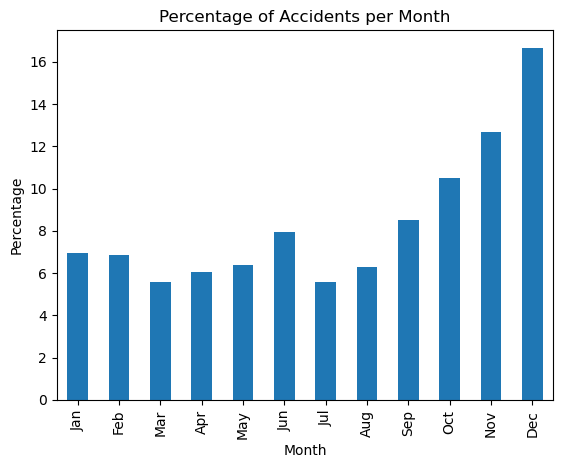

In [260]:
a.plot(kind = 'bar', xlabel = "Month", ylabel = 'Percentage', title = 'Percentage of Accidents per Month')

1. From the above visualisation, it can be concluded that late months of the year have more accidents compared to the rest of the year.
2. This might be because of changing season and oncoming of winters which leads to slippery roads and sometimes traffic jams leading to dense traffic in some areas.